# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [45]:
import pandas as pd

df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

## Check for null or missing data

In [46]:
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

The only column with null values is DepDel15. Lets look into it

In [47]:
# searching nulls
df_flights[df_flights.isnull().any(axis=1)].groupby('DepDelay').count()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
DepDelay,,,,,,,,,,,,,,,,,,,
0,2761,2761,2761,2761,2761,2761,2761,2761,2761,2761,2761,2761,2761,2761,0,2761,2761,2761,2761


It looks that the only null values on DepDel15 corresponds to a 0 value on DepDelay. It can be assumed that when there was no delay the column was simply not filled. let fill all those values with 0, as there was no delay.

In [48]:
df_flights['DepDel15'] = df_flights['DepDel15'].fillna(0)
df_flights[df_flights.isnull().any(axis=1)].groupby('DepDelay').count()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
DepDelay,,,,,,,,,,,,,,,,,,,


Now there are no null values in our df

## Find Outliers on DepDelay and ArrDelay

Minimum:-63.00
Mean:10.35
Median:-1.00
Mode:-3.00
Maximum:1425.00

Minimum:-75.00
Mean:6.50
Median:-3.00
Mode:0.00
Maximum:1440.00



C:\Users\lab\AppData\Local\Temp\ipykernel_11756\1125270032.py:51: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


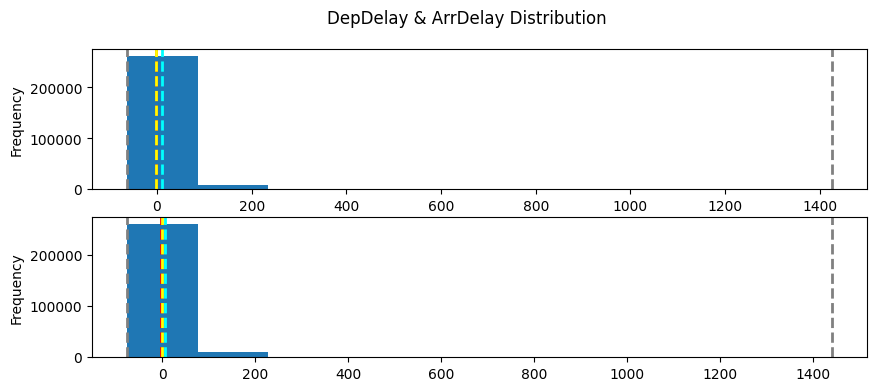

In [49]:
from matplotlib import pyplot as plt

depDelay = df_flights.DepDelay
arrDelay = df_flights.ArrDelay

min_val_dd = depDelay.min()
max_val_dd = depDelay.max()
mean_val_dd =depDelay.mean()
med_val_dd = depDelay.median()
mod_val_dd = depDelay.mode()[0]

min_val_ar= arrDelay.min()
max_val_ar= arrDelay.max()
mean_val_ar = arrDelay.mean()
med_val_ar= arrDelay.median()
mod_val_ar= arrDelay.mode()[0]

print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val_dd,
                                                                                            mean_val_dd,
                                                                                            med_val_dd,
                                                                                            mod_val_dd,
                                                                                            max_val_dd))

print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val_ar,
                                                                                            mean_val_ar,
                                                                                            med_val_ar,
                                                                                            mod_val_ar,
                                                                                            max_val_ar))

fig, ax = plt.subplots(2, 1, figsize = (10,4))


ax[0].hist(depDelay)
ax[0].set_ylabel('Frequency')
ax[0].axvline(x=min_val_dd, color = 'gray', linestyle='dashed', linewidth = 2)
ax[0].axvline(x=mean_val_dd, color = 'cyan', linestyle='dashed', linewidth = 2)
ax[0].axvline(x=med_val_dd, color = 'red', linestyle='dashed', linewidth = 2)
ax[0].axvline(x=mod_val_dd, color = 'yellow', linestyle='dashed', linewidth = 2)
ax[0].axvline(x=max_val_dd, color = 'gray', linestyle='dashed', linewidth = 2)

ax[1].hist(arrDelay)
ax[1].set_ylabel('Frequency')
ax[1].axvline(x=min_val_ar, color = 'gray', linestyle='dashed', linewidth = 2)
ax[1].axvline(x=mean_val_ar, color = 'cyan', linestyle='dashed', linewidth = 2)
ax[1].axvline(x=med_val_ar, color = 'red', linestyle='dashed', linewidth = 2)
ax[1].axvline(x=mod_val_ar, color = 'yellow', linestyle='dashed', linewidth = 2)
ax[1].axvline(x=max_val_ar, color = 'gray', linestyle='dashed', linewidth = 2)

fig.suptitle('DepDelay & ArrDelay Distribution')

fig.show()


It looks that we have some outliers that are greater than 100 for ArrDelay and DepDelay

Minimum:-63.00
Mean:10.35
Median:-1.00
Mode:-3.00
Maximum:1425.00

Minimum:-75.00
Mean:6.50
Median:-3.00
Mode:0.00
Maximum:1440.00



C:\Users\lab\AppData\Local\Temp\ipykernel_11756\890534932.py:50: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


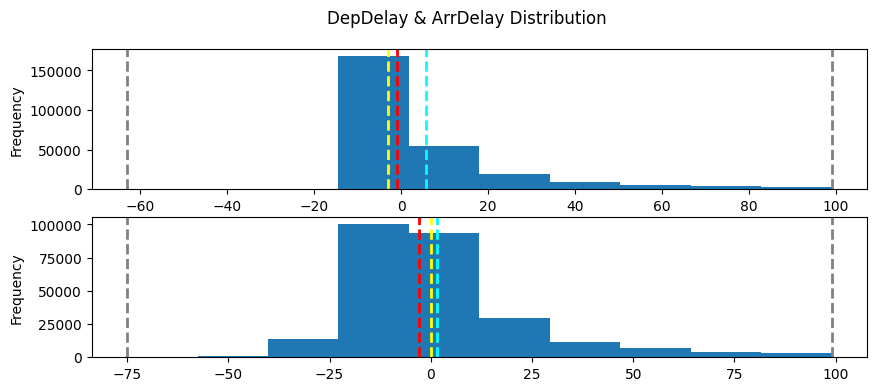

In [50]:
from matplotlib import pyplot as plt

print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val_dd,
                                                                                            mean_val_dd,
                                                                                            med_val_dd,
                                                                                            mod_val_dd,
                                                                                            max_val_dd))

print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val_ar,
                                                                                            mean_val_ar,
                                                                                            med_val_ar,
                                                                                            mod_val_ar,
                                                                                            max_val_ar))

fig, ax = plt.subplots(2, 1, figsize = (10,4))

depDelay = df_flights.loc[df_flights['DepDelay'] < 100].DepDelay
arrDelay = df_flights.loc[df_flights['ArrDelay'] < 100].ArrDelay

min_val_dd = depDelay.min()
max_val_dd = depDelay.max()
mean_val_dd =depDelay.mean()
med_val_dd = depDelay.median()
mod_val_dd = depDelay.mode()[0]

min_val_ar= arrDelay.min()
max_val_ar= arrDelay.max()
mean_val_ar = arrDelay.mean()
med_val_ar= arrDelay.median()
mod_val_ar= arrDelay.mode()[0]

ax[0].hist(depDelay)
ax[0].set_ylabel('Frequency')
ax[0].axvline(x=min_val_dd, color = 'gray', linestyle='dashed', linewidth = 2)
ax[0].axvline(x=mean_val_dd, color = 'cyan', linestyle='dashed', linewidth = 2)
ax[0].axvline(x=med_val_dd, color = 'red', linestyle='dashed', linewidth = 2)
ax[0].axvline(x=mod_val_dd, color = 'yellow', linestyle='dashed', linewidth = 2)
ax[0].axvline(x=max_val_dd, color = 'gray', linestyle='dashed', linewidth = 2)

ax[1].hist(arrDelay)
ax[1].set_ylabel('Frequency')
ax[1].axvline(x=min_val_ar, color = 'gray', linestyle='dashed', linewidth = 2)
ax[1].axvline(x=mean_val_ar, color = 'cyan', linestyle='dashed', linewidth = 2)
ax[1].axvline(x=med_val_ar, color = 'red', linestyle='dashed', linewidth = 2)
ax[1].axvline(x=mod_val_ar, color = 'yellow', linestyle='dashed', linewidth = 2)
ax[1].axvline(x=max_val_ar, color = 'gray', linestyle='dashed', linewidth = 2)

fig.suptitle('DepDelay & ArrDelay Distribution')

fig.show()


After seeing the graph I think we can confidently reduce the scope to anything les than 10 and greater than -10 on both columns.

In [51]:
print(df_flights.shape[0], df_flights.loc[df_flights['DepDelay'] > 10].shape[0], df_flights.loc[df_flights['DepDelay'] < -10].shape[0])

271940 63972 4595


Minimum:-63.00
Mean:5.62
Median:-1.00
Mode:-3.00
Maximum:99.00

Minimum:-75.00
Mean:1.55
Median:-3.00
Mode:0.00
Maximum:99.00



C:\Users\lab\AppData\Local\Temp\ipykernel_11756\1041239783.py:50: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


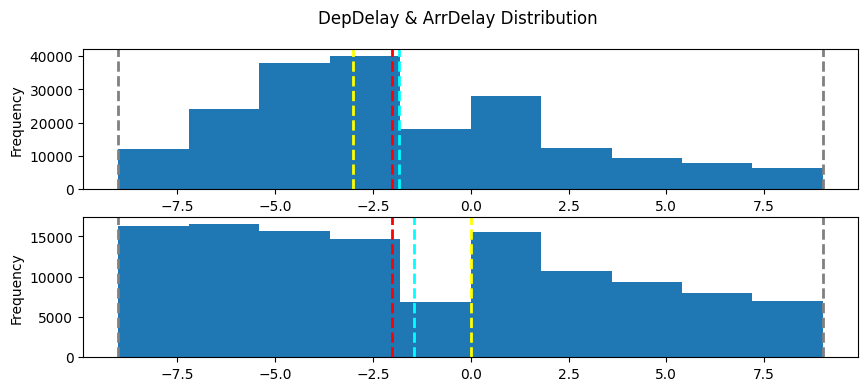

In [52]:
from matplotlib import pyplot as plt

print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val_dd,
                                                                                            mean_val_dd,
                                                                                            med_val_dd,
                                                                                            mod_val_dd,
                                                                                            max_val_dd))

print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val_ar,
                                                                                            mean_val_ar,
                                                                                            med_val_ar,
                                                                                            mod_val_ar,
                                                                                            max_val_ar))

fig, ax = plt.subplots(2, 1, figsize = (10,4))

depDelay = df_flights.loc[(df_flights['DepDelay'] < 10) & (df_flights['DepDelay'] > -10)].DepDelay
arrDelay = df_flights.loc[(df_flights['ArrDelay'] < 10) & (df_flights['ArrDelay'] > -10)].ArrDelay

min_val_dd = depDelay.min()
max_val_dd = depDelay.max()
mean_val_dd =depDelay.mean()
med_val_dd = depDelay.median()
mod_val_dd = depDelay.mode()[0]

min_val_ar= arrDelay.min()
max_val_ar= arrDelay.max()
mean_val_ar = arrDelay.mean()
med_val_ar= arrDelay.median()
mod_val_ar= arrDelay.mode()[0]

ax[0].hist(depDelay)
ax[0].set_ylabel('Frequency')
ax[0].axvline(x=min_val_dd, color = 'gray', linestyle='dashed', linewidth = 2)
ax[0].axvline(x=mean_val_dd, color = 'cyan', linestyle='dashed', linewidth = 2)
ax[0].axvline(x=med_val_dd, color = 'red', linestyle='dashed', linewidth = 2)
ax[0].axvline(x=mod_val_dd, color = 'yellow', linestyle='dashed', linewidth = 2)
ax[0].axvline(x=max_val_dd, color = 'gray', linestyle='dashed', linewidth = 2)

ax[1].hist(arrDelay)
ax[1].set_ylabel('Frequency')
ax[1].axvline(x=min_val_ar, color = 'gray', linestyle='dashed', linewidth = 2)
ax[1].axvline(x=mean_val_ar, color = 'cyan', linestyle='dashed', linewidth = 2)
ax[1].axvline(x=med_val_ar, color = 'red', linestyle='dashed', linewidth = 2)
ax[1].axvline(x=mod_val_ar, color = 'yellow', linestyle='dashed', linewidth = 2)
ax[1].axvline(x=max_val_ar, color = 'gray', linestyle='dashed', linewidth = 2)

fig.suptitle('DepDelay & ArrDelay Distribution')

fig.show()


## Trim Down Df

In [53]:
df_flights = df_flights.loc[(df_flights['DepDelay'] < 10) & (df_flights['DepDelay'] > -10)]
df_flights = df_flights.loc[(df_flights['ArrDelay'] < 10) & (df_flights['ArrDelay'] > -10)]